## Блок 1 — Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, Binarizer
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    classification_report,
    roc_curve,
    auc
)

from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

metrics_list = []


 В этом блоке происходит подключение всех необходимых библиотек, которые используются в лабораторной работе по анализу датасета Iris. Библиотеки NumPy и Pandas обеспечивают работу с данными и числовыми массивами, Matplotlib и Seaborn — построение графиков разной сложности. Далее подключаются модули из библиотеки Scikit-Learn, которые используются для классических методов машинного обучения и для расчёта метрик качества классификации. Также импортируются функции для подготовки данных: масштабирование признаков, кодирование классов и бинаризация.  

Отдельно подключаются классы нескольких разновидностей Наивных Байесовских классификаторов, дерево решений, линейный дискриминантный анализ, метод опорных векторов и алгоритм k-ближайших соседей. В конце импортируются компоненты TensorFlow/Keras, позволяющие создать и обучить нейронную сеть для многоклассовой классификации.  

Создаётся пустой список `metrics_list`, в который впоследствии будут собираться метрики всех моделей, что позволит легко сравнить их качество между собой.



## Загрузка датасета и первичный анализ

In [2]:
data = pd.read_csv("iris.csv")

display(data.head())

print("Информация о датасете:")
data.info()

print("\nКоличество пропусков в каждом столбце:")
print(data.isnull().sum())

print("\nОписательная статистика по числовым признакам:")
display(data.describe().round(2))


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Количество пропусков в каждом столбце:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Описательная статистика по числовым признакам:


,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


На этом этапе производится загрузка датасета Iris из файла `iris.csv`. Этот набор данных является одним из самых известных в машинном обучении и содержит измерения трёх видов ириса: Iris-setosa, Iris-versicolor и Iris-virginica.  

Сначала выводятся первые строки таблицы с помощью функции `head()`, что позволяет убедиться, что данные считались корректно и содержат все ожидаемые признаки:  

- **sepal_length** — длина чашелистика  
- **sepal_width** — ширина чашелистика  
- **petal_length** — длина лепестка  
- **petal_width** — ширина лепестка  
- **species** — вид цветка  

Далее с помощью `info()` выводится структура датасета: количество строк, типы данных каждого столбца и размерность. Это помогает проверить, что все числовые признаки действительно представлены в числовом формате, а целевая переменная — в строковом.  

Затем анализируются пропуски в данных, и, как ожидается для этого классического датасета, их нет.  

Завершает блок таблица с описательной статистикой. Здесь можно увидеть минимальные, максимальные значения и средние величины каждого признака, что даёт общее понимание масштаба данных и помогает заметить различия между признаками ещё до построения графиков.


## Гистограммы и корреляционная матрица

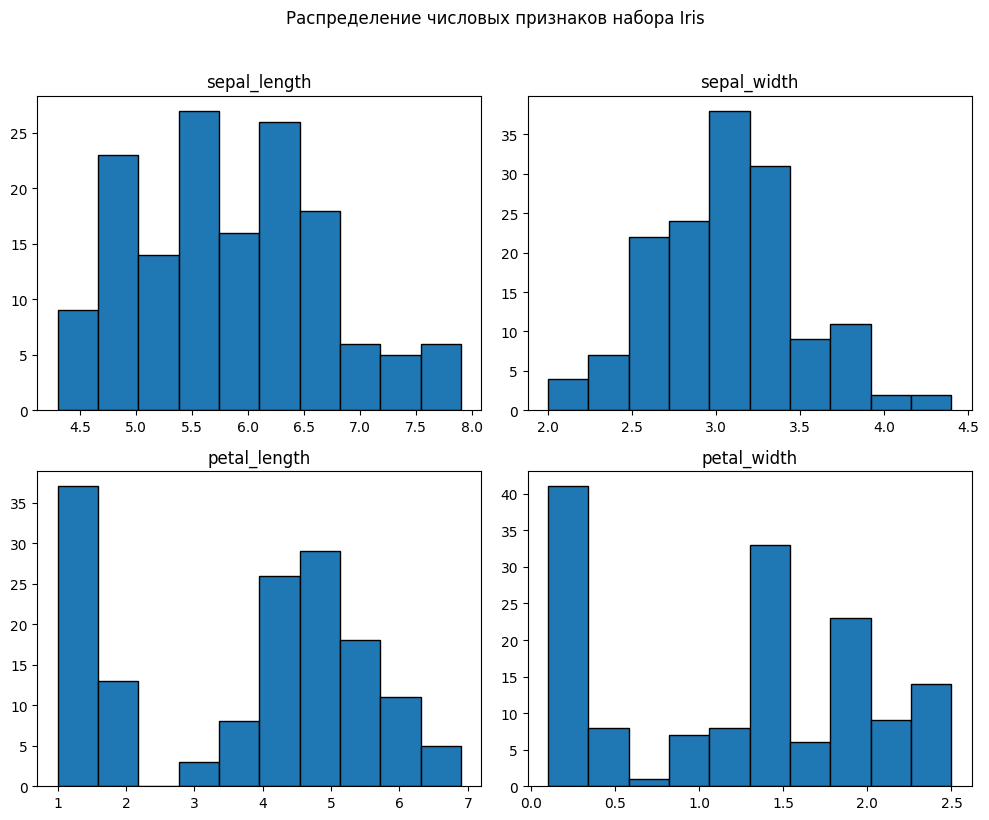

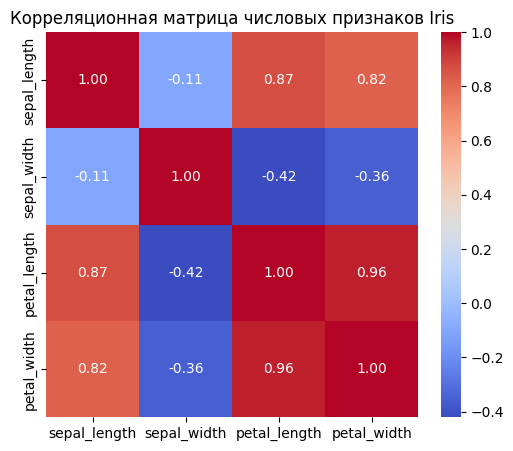

In [3]:
data.hist(edgecolor="black", figsize=(10, 8), grid=False)
plt.suptitle("Распределение числовых признаков набора Iris", y=1.02)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(
    data.select_dtypes(include=[np.number]).corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Корреляционная матрица числовых признаков Iris")
plt.show()


В этом фрагменте проводится визуальный анализ числовых признаков датасета Iris.  

### 🔹 Гистограммы числовых признаков  
Первая группа графиков представляет собой набор гистограмм, по одной для каждого числового признака.  
Эти графики позволяют увидеть распределение каждого измерения:

- длины и ширины чашелистика (sepal_length, sepal_width),  
- длины и ширины лепестка (petal_length, petal_width).

На гистограммах видно, что признаки имеют разные формы распределений: например, ширина чашелистика имеет довольно разнообразное распределение, а длина лепестка показывает явное разделение между классами — у Iris-setosa лепестки значительно короче. Это уже на визуальном уровне подсказывает, что некоторые признаки будут более информативными для классификации.

### 🔹 Корреляционная матрица  
Вторая визуализация — корреляционная матрица. Она показывает, как числовые признаки связаны между собой.  

На ней можно заметить две ключевые закономерности:

- **petal_length и petal_width сильно коррелируют**, что логично, поскольку длина и ширина лепестка связаны биологически.  
- **sepal_width показывает слабую отрицательную корреляцию с длиной лепестка**, что тоже отражает особенности разных видов ириса.

Корреляционная матрица помогает понять, какие признаки содержат похожую информацию, а какие несут дополнительный вклад в обучение модели. Это важный шаг в анализе данных перед построением классификаторов.


## Блок 4 — Подготовка данных

In [4]:
target_column = "species"

label_encoder = LabelEncoder()
data["target_encoded"] = label_encoder.fit_transform(data[target_column])

feature_columns = [col for col in data.columns if col != target_column and col != "target_encoded"]
X = data[feature_columns]
y = data["target_encoded"]

print("Используемые признаки:", feature_columns)
print("Соответствие классов и числовых кодов:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nРазмер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

binarizer = Binarizer(threshold=float(X_train.mean().mean()))
X_train_bin = binarizer.fit_transform(X_train)
X_test_bin = binarizer.transform(X_test)


Используемые признаки: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Соответствие классов и числовых кодов:
{'setosa': np.int64(0), 'versicolor': np.int64(1), 'virginica': np.int64(2)}

Размер обучающей выборки: (120, 4)
Размер тестовой выборки: (30, 4)


Здесь происходит подготовка данных для последующего обучения моделей.  

Целевая переменная `species`, содержащая строковые названия видов ириса, преобразуется в числовой формат с помощью `LabelEncoder`. Это необходимо, потому что модели машинного обучения не работают с текстовыми метками. Каждый вид цветка получает свой числовой код, и кодировка выводится на экран, чтобы можно было сопоставить числа и классы.

Признаки формируются из всех числовых столбцов, кроме закодированной целевой переменной. Затем данные делятся на обучающую и тестовую выборки: 80% используется для обучения, а 20% — для проверки качества моделей. При этом используется параметр `stratify=y`, который сохраняет одинаковые пропорции классов и в обучающей, и в тестовой выборках. Это важно для корректного сравнения моделей.

Поскольку модели по-разному реагируют на масштабы признаков, проводится масштабирование с помощью `StandardScaler`. Признаки приводятся к стандартному нормальному распределению, что особенно полезно для моделей SVM, kNN и LDA.  

Также создаётся бинаризованная версия данных, где все значения преобразуются в 0 или 1, что требуется для корректной работы классификатора BernoulliNB.

Этот блок завершает подготовку данных, и теперь можно обучать набор разных моделей.


## Блок 5 — Обучение классических моделей

In [5]:
def evaluate_model(name, model, X_train_local, X_test_local, y_train_local, y_test_local,
                   metrics_storage, use_proba_for_roc=True):
    model.fit(X_train_local, y_train_local)
    y_pred = model.predict(X_test_local)

    acc = accuracy_score(y_test_local, y_pred)
    prec = precision_score(y_test_local, y_pred, average="macro", zero_division=0)
    rec = recall_score(y_test_local, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_test_local, y_pred, average="macro", zero_division=0)

    if use_proba_for_roc and hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_local)
        try:
            roc = roc_auc_score(y_test_local, y_score, multi_class="ovr", average="macro")
        except ValueError:
            roc = np.nan
    else:
        roc = np.nan

    metrics_storage.append({
        "model": name,
        "accuracy": acc,
        "precision_macro": prec,
        "recall_macro": rec,
        "f1_macro": f1,
        "roc_auc_macro_ovr": roc
    })

    print(f"\n==================== {name} ====================")
    print("Confusion matrix:")
    print(confusion_matrix(y_test_local, y_pred))
    print("\nClassification report:")
    print(classification_report(
        y_test_local,
        y_pred,
        target_names=label_encoder.classes_,
        zero_division=0
    ))

    return model


gnb = GaussianNB()
evaluate_model("GaussianNB", gnb, X_train_scaled, X_test_scaled, y_train, y_test, metrics_list)

mnb = MultinomialNB()
evaluate_model("MultinomialNB", mnb, X_train, X_test, y_train, y_test, metrics_list)

cnb = ComplementNB()
evaluate_model("ComplementNB", cnb, X_train, X_test, y_train, y_test, metrics_list)

bnb = BernoulliNB()
evaluate_model("BernoulliNB", bnb, X_train_bin, X_test_bin, y_train, y_test, metrics_list)

dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    random_state=42
)
evaluate_model("DecisionTree", dt, X_train, X_test, y_train, y_test, metrics_list)

lda = LinearDiscriminantAnalysis()
evaluate_model("LDA", lda, X_train_scaled, X_test_scaled, y_train, y_test, metrics_list)

svm_clf = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    probability=True,
    random_state=42
)
evaluate_model("SVM (RBF kernel)", svm_clf, X_train_scaled, X_test_scaled, y_train, y_test, metrics_list)

knn = KNeighborsClassifier(
    n_neighbors=5,
    weights="uniform",
    metric="minkowski",
    p=2
)
evaluate_model("KNN (k=5)", knn, X_train_scaled, X_test_scaled, y_train, y_test, metrics_list)



==================== GaussianNB ====================
Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


==================== MultinomialNB ====================
Confusion matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00 

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


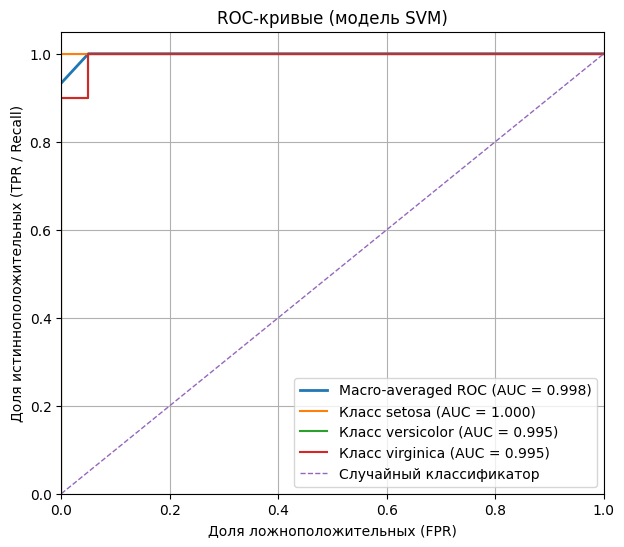

In [6]:
# ROC-кривые для SVM (мультиклассовый случай, схема one-vs-rest)

# Количество классов
n_classes = len(label_encoder.classes_)

# Бинаризуем истинные метки (one-hot)
y_test_bin = to_categorical(y_test, num_classes=n_classes)

# Получаем вероятности классов от SVM
y_score = svm_clf.predict_proba(X_test_scaled)

# Словари для FPR, TPR и AUC по каждому классу
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Строим macro-average ROC-кривую (средняя по всем классам)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)

# Рисуем график
plt.figure(figsize=(7, 6))

# Macro-average ROC
plt.plot(
    all_fpr,
    mean_tpr,
    label=f"Macro-averaged ROC (AUC = {roc_auc['macro']:.3f})",
    linewidth=2
)

# ROC-кривые для каждого класса
for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        linewidth=1.5,
        label=f"Класс {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.3f})"
    )

# Линия случайного классификатора
plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1, label="Случайный классификатор")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Доля ложноположительных (FPR)")
plt.ylabel("Доля истинноположительных (TPR / Recall)")
plt.title("ROC-кривые (модель SVM)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


В этом блоке создаётся универсальная функция `evaluate_model`, которая обучает любую модель, делает предсказания и рассчитывает все ключевые метрики, необходимые для анализа качества классификации. Функция выводит confusion matrix — матрицу ошибок, которая позволяет увидеть, какие именно классы модель путает между собой. Кроме того, выводится подробный отчёт со значениями точности (Precision), полноты (Recall) и F1-меры по каждому классу.

После определения функции обучается полный набор классических моделей классификации, каждая из которых анализирует одни и те же данные Iris:

- четыре варианта Наивного Байесовского классификатора,
- дерево решений,
- линейный дискриминантный анализ,
- метод опорных векторов,
- метод k-ближайших соседей.

Каждая модель проходит одинаковую процедуру оценки, что позволяет корректно сравнить их между собой по точности и другим метрикам. Результаты сохраняются в список `metrics_list`, откуда будут собраны в таблицу на следующем этапе.


## Блок 6 — Таблица метрик

In [7]:
metrics_df = pd.DataFrame(metrics_list)
print("Метрики классических моделей на датасете Iris:")
display(metrics_df)

print("\nМодели, отсортированные по точности (Accuracy):")
display(metrics_df.sort_values(by="accuracy", ascending=False))


Метрики классических моделей на датасете Iris:


,model,accuracy,precision_macro,recall_macro,f1_macro,roc_auc_macro_ovr
0,GaussianNB,0.966667,0.969697,0.966667,0.966583,0.990000
1,MultinomialNB,1.000000,1.000000,1.000000,1.000000,0.981667
2,ComplementNB,0.666667,0.500000,0.666667,0.555556,0.968333
3,BernoulliNB,0.600000,0.425926,0.600000,0.493506,0.813333
4,DecisionTree,0.933333,0.933333,0.933333,0.933333,0.950000
5,LDA,1.000000,1.000000,1.000000,1.000000,1.000000
6,SVM (RBF kernel),0.966667,0.969697,0.966667,0.966583,0.996667
7,KNN (k=5),0.933333,0.944444,0.933333,0.932660,0.993333



Модели, отсортированные по точности (Accuracy):


,model,accuracy,precision_macro,recall_macro,f1_macro,roc_auc_macro_ovr
1,MultinomialNB,1.000000,1.000000,1.000000,1.000000,0.981667
5,LDA,1.000000,1.000000,1.000000,1.000000,1.000000
6,SVM (RBF kernel),0.966667,0.969697,0.966667,0.966583,0.996667
0,GaussianNB,0.966667,0.969697,0.966667,0.966583,0.990000
4,DecisionTree,0.933333,0.933333,0.933333,0.933333,0.950000
7,KNN (k=5),0.933333,0.944444,0.933333,0.932660,0.993333
2,ComplementNB,0.666667,0.500000,0.666667,0.555556,0.968333
3,BernoulliNB,0.600000,0.425926,0.600000,0.493506,0.813333


Этот блок объединяет все полученные ранее метрики в таблицу формата `DataFrame`. В результате выводится аккуратная и структурированная таблица, где для каждой модели указаны значения точности, усреднённой точности, полноты, F1-меры и многоклассового ROC-AUC.  

Затем таблица сортируется по метрике accuracy, что позволяет мгновенно увидеть, какая модель показала наилучший результат на тестовой выборке Iris. Такой подход даёт объективное основание для выбора лучшего классификатора и помогает анализировать сильные и слабые стороны различных алгоритмов.


## Блок 7 — Архитектура нейронной сети

In [8]:
num_classes = len(label_encoder.classes_)
print("Количество классов:", num_classes)

y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

X_train_nn = X_train_scaled
X_test_nn = X_test_scaled

print("Форма X_train_nn:", X_train_nn.shape)
print("Форма y_train_cat:", y_train_cat.shape)

model_nn = keras.Sequential([
    layers.Input(shape=(X_train_nn.shape[1],)),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

model_nn.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_nn.summary()


Количество классов: 3
Форма X_train_nn: (120, 4)
Форма y_train_cat: (120, 3)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

На этом этапе формируется нейронная сеть для решения задачи многоклассовой классификации. Количество выходных нейронов определяется количеством видов ириса, а сама целевая переменная кодируется в формат one-hot, который представляет каждый класс в виде бинарного вектора.  

Входные данные берутся из масштабированных признаков, что улучшает работу градиентных методов при обучении сети. Архитектура модели состоит из двух скрытых слоёв с функциями активации ReLU, которые позволяют эффективно моделировать нелинейные зависимости между признаками.  

Выходной слой использует функцию активации softmax, которая преобразует выходы модели в вероятности принадлежности к каждому классу. После компиляции модели выводится её структура, включающая количество слоёв, форму входа, количество параметров и распределение весов. Этот блок полностью подготавливает нейросеть к обучению.


## Блок 8 — Обучение нейросети и графики

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.3438 - loss: 1.2196 - val_accuracy: 0.2500 - val_loss: 1.2181
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3646 - loss: 1.1603 - val_accuracy: 0.2500 - val_loss: 1.1644
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4271 - loss: 1.1097 - val_accuracy: 0.3750 - val_loss: 1.1131
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4479 - loss: 1.0623 - val_accuracy: 0.4167 - val_loss: 1.0669
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5104 - loss: 1.0174 - val_accuracy: 0.4167 - val_loss: 1.0259
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5417 - loss: 0.9781 - val_accuracy: 0.4167 - val_loss: 0.9873
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5625 - loss: 0.9404 - val_accuracy: 0.5833 - val_loss: 0.9520
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7083 - loss: 0.9076 - val_accuracy: 0.6667 - val_loss:

,model,accuracy,precision_macro,recall_macro,f1_macro,roc_auc_macro_ovr
1,MultinomialNB,1.000000,1.000000,1.000000,1.000000,0.981667
5,LDA,1.000000,1.000000,1.000000,1.000000,1.000000
0,GaussianNB,0.966667,0.969697,0.966667,0.966583,0.990000
6,SVM (RBF kernel),0.966667,0.969697,0.966667,0.966583,0.996667
4,DecisionTree,0.933333,0.933333,0.933333,0.933333,0.950000
7,KNN (k=5),0.933333,0.944444,0.933333,0.932660,0.993333
8,Neural Network,0.933333,0.933333,0.933333,0.933333,0.996667
2,ComplementNB,0.666667,0.500000,0.666667,0.555556,0.968333
3,BernoulliNB,0.600000,0.425926,0.600000,0.493506,0.813333


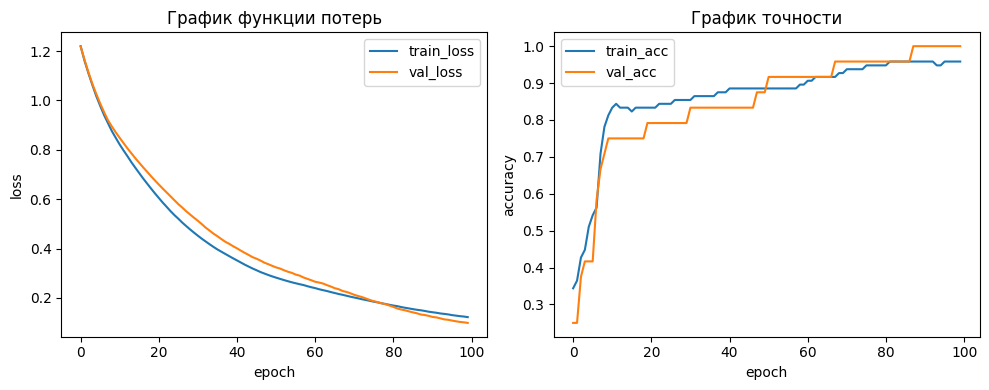

In [9]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history = model_nn.fit(
    X_train_nn,
    y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

test_loss, test_acc = model_nn.evaluate(X_test_nn, y_test_cat, verbose=0)
print(f"\nTest loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

y_pred_proba_nn = model_nn.predict(X_test_nn)
y_pred_nn = np.argmax(y_pred_proba_nn, axis=1)

acc_nn = accuracy_score(y_test, y_pred_nn)
prec_nn = precision_score(y_test, y_pred_nn, average="macro", zero_division=0)
rec_nn = recall_score(y_test, y_pred_nn, average="macro", zero_division=0)
f1_nn = f1_score(y_test, y_pred_nn, average="macro", zero_division=0)

try:
    roc_nn = roc_auc_score(y_test, y_pred_proba_nn, multi_class="ovr", average="macro")
except ValueError:
    roc_nn = np.nan

print("\n=== Метрики нейронной сети ===")
print("Accuracy:", acc_nn)
print("Precision (macro):", prec_nn)
print("Recall (macro):", rec_nn)
print("F1 (macro):", f1_nn)
print("ROC-AUC (macro, ovr):", roc_nn)

print("\nClassification report (NN):")
print(classification_report(
    y_test,
    y_pred_nn,
    target_names=label_encoder.classes_,
    zero_division=0
))

metrics_list.append({
    "model": "Neural Network",
    "accuracy": acc_nn,
    "precision_macro": prec_nn,
    "recall_macro": rec_nn,
    "f1_macro": f1_nn,
    "roc_auc_macro_ovr": roc_nn
})

metrics_df = pd.DataFrame(metrics_list)
print("\nВсе модели с учётом нейросети, отсортированные по Accuracy:")
display(metrics_df.sort_values(by="accuracy", ascending=False))

history_dict = history.history

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="train_loss")
plt.plot(history_dict["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("График функции потерь")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict["accuracy"], label="train_acc")
plt.plot(history_dict["val_accuracy"], label="val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("График точности")
plt.legend()

plt.tight_layout()
plt.show()


Здесь происходит обучение нейронной сети на данных Iris. Для контроля процесса используется механизм ранней остановки, который прекращает обучение, если валидационная ошибка перестаёт снижаться. Это позволяет избежать переобучения и выбрать модель, которая лучше всего обобщает данные.  

После завершения обучения вычисляются метрики качества на тестовой выборке: точность, усреднённые по классам точность и полнота, F1-мера и многоклассовый ROC-AUC. Эти значения добавляются в общую таблицу метрик, что даёт возможность сопоставить качество нейросети с предыдущими моделями.  

### Графики обучения  
В конце строятся две кривые:

#### **1. График функции потерь (Loss)**  
Он показывает, как менялась ошибка на обучающих и валидационных данных. При нормальном обучении кривая должна плавно снижаться. Разница между train_loss и val_loss показывает степень переобучения.

#### **2. График точности (Accuracy)**  
Показывает, как росла точность классификации с каждой эпохой обучения. Близость линий обучающей и валидационной точности означает хорошее обобщение модели.

Такие графики позволяют визуально оценить стабильность обучения, наличие переобучения и закономерности процесса оптимизации. Это важный этап анализа работы нейронной сети.
